
# 📘 Module 20: AdaBoost (Adaptive Boosting) – Practice Notebook

This is a **full practice notebook with detailed guidance and TODO blocks**.


## 0. Notebook Setup

We start by importing all required libraries.  


In [29]:
# TODO: Import all required libraries (Done for you)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## 1. Understanding the Dataset

You can begin with a **synthetic binary classification dataset**. or with any exisiting dataset.

Focus questions:
- Are the classes easily separable?
- Will a weak learner struggle?


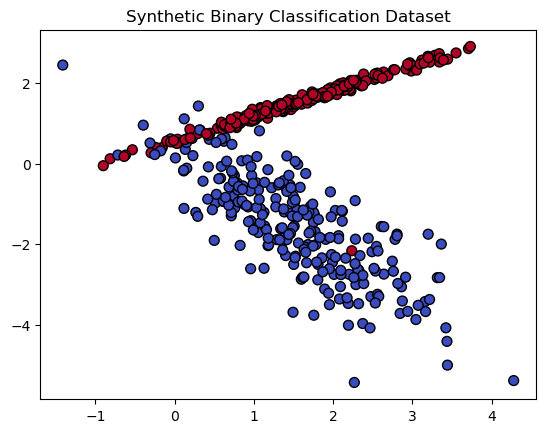

In [31]:
# Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1, 
    class_sep=1.5,
    random_state=42)

# Visualize the dataset using a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
plt.title("Synthetic Binary Classification Dataset")
plt.show()

In [ ]:
# TODO: Visualize the dataset using a scatter plot
# Color points by class label

# plt.scatter(...)
# plt.show()


## 2. Train–Test Split

Before any model training, we split the data.

Why?
- To evaluate generalization
- To avoid lying to ourselves

Standard split:
- 70% training
- 30% testing


In [3]:
# TODO: Split the dataset into training and testing sets
# Use test_size=0.3 and random_state=42
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 3. Baseline Weak Learner (Decision Stump)

Before AdaBoost, we test **one weak learner alone**.

We intentionally restrict the model:
- max_depth = 1
- This is called a **decision stump**

Expectation:
- Accuracy will not be impressive
- That is the point


In [4]:
# TODO: Create a DecisionTreeClassifier with max_depth=1
# SVM, Logistic Regression
# This is our weak learner
# Create a DecisionTreeClassifier with max_depth=1
weak_learner = DecisionTreeClassifier(max_depth=1)

In [5]:
# TODO: Train the weak learner
# TODO: Predict on test data
# TODO: Calculate and print accuracy
# Train the weak learner
weak_learner.fit(X_train, y_train)

# Predict on test data
y_pred_weak = weak_learner.predict(X_test)

# Calculate and print accuracy
accuracy_weak = accuracy_score(y_test, y_pred_weak)
print(f"Weak Learner Accuracy: {accuracy_weak:.4f}")

Weak Learner Accuracy: 0.9400



## 4. AdaBoost Classifier – Core Practice

Now we combine **many weak learners** using AdaBoost.

Key idea:
- Each learner focuses more on previous mistakes
- Misclassified samples get more attention
- Correctly classified samples slowly matter less


In [10]:
# TODO: Initialize AdaBoostClassifier
# Use:
# - base_estimator = decision stump
# - n_estimators = 50
# - learning_rate = 1.0
# Initialize AdaBoostClassifier
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                              n_estimators=50, 
                              learning_rate=1.0,
                              random_state=42)

In [8]:
# TODO: Train AdaBoost on training data
# TODO: Predict on test data
# TODO: Evaluate accuracy
# TODO: Print classification report
# Train AdaBoost on training data
adaboost.fit(X_train, y_train)

# Predict on test data
y_pred_adaboost = adaboost.predict(X_test)

# Evaluate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")

# Print classification report
print(classification_report(y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        75
           1       0.96      0.91      0.93        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150




## 5. Weak Learner vs AdaBoost Comparison

Now we compare:
- One weak learner
- Many weak learners working together

Expectation:
- AdaBoost should outperform a single stump
- If not, something is wrong


In [9]:
# TODO: Create a comparison table
# Columns:
# - Model
# - Accuracy
# Create a comparison table
comparison = pd.DataFrame({
    'Model': ['Weak Learner (Decision Stump)', 'AdaBoost'],
    'Accuracy': [accuracy_weak, accuracy_adaboost]
})

print(comparison)

                           Model  Accuracy
0  Weak Learner (Decision Stump)  0.940000
1                       AdaBoost  0.933333



## 6. Effect of Number of Estimators

AdaBoost performance depends heavily on:
- Number of estimators

More is not always better.

Your job:
- Experiment
- Observe
- Plot


In [32]:
# TODO: Try different n_estimators values
# Example: [5, 10, 20, 50, 100]

# Store accuracy for each value
# Try different n_estimators values
n_estimators_values = [5, 10, 20, 50, 100]
accuracies = []

for n_estimators in n_estimators_values:
    adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), 
                                  n_estimators=n_estimators,
                                  learning_rate=1.0,
                                  random_state=42)
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

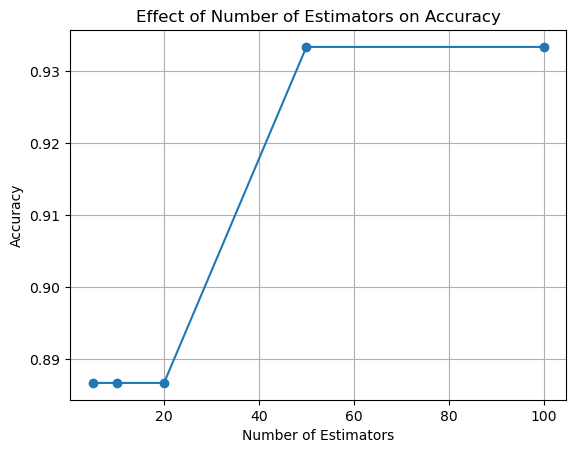

In [13]:
# TODO: Plot n_estimators vs accuracy
# Label axes clearly
# Plot n_estimators vs accuracy
plt.plot(n_estimators_values, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Estimators on Accuracy')
plt.grid(True)
plt.show()


## 7. Effect of Learning Rate

Learning rate controls **how aggressively** AdaBoost updates sample weights.

Intuition:
- High learning rate → fast but risky
- Low learning rate → slow but stable

You will verify this experimentally.


In [15]:
# TODO: Experiment with different learning_rate values
# Example: [0.01, 0.1, 0.5, 1.0]
# Experiment with different learning_rate values
learning_rate_values = [0.01, 0.1, 0.5, 1.0]
accuracies_lr = []

for lr in learning_rate_values:
    adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=lr, random_state=42)
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_lr.append(accuracy)

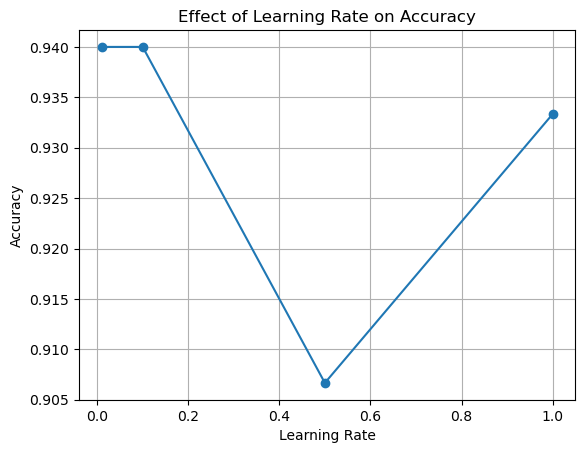

In [16]:
# TODO: Plot learning_rate vs accuracy
# Plot learning_rate vs accuracy
plt.plot(learning_rate_values, accuracies_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Accuracy')
plt.grid(True)
plt.show()


## 8. Feature Importance in AdaBoost

AdaBoost can tell us:
- Which features were more influential

This depends on:
- How often a feature is used in splits
- How strong the corresponding learners were


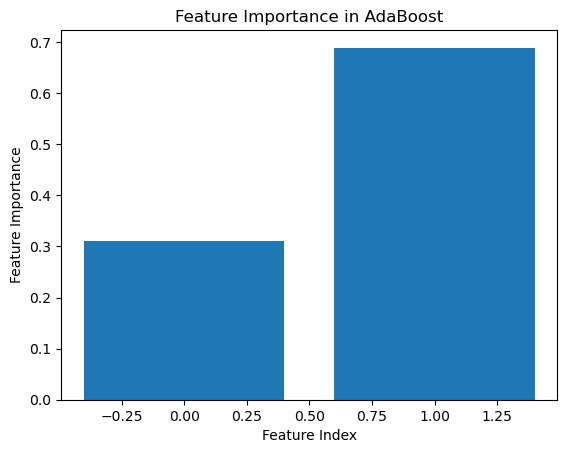

In [17]:
# TODO: Extract feature importance from AdaBoost
# TODO: Plot feature importance
# Extract feature importance from AdaBoost
feature_importances = adaboost.feature_importances_

# Plot feature importance
plt.bar(range(X.shape[1]), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in AdaBoost')
plt.show()


## 9. Reflection (Mandatory)

Answer in your own words.

1. Why is AdaBoost called *adaptive*?
2. What happens to misclassified samples after each iteration?
3. Why do we prefer weak learners instead of strong ones?
4. When should AdaBoost not be used?



## 10. Bonus Challenge (Optional)

Replace the decision stump with **Logistic Regression** as the base estimator.

Questions:
- Does AdaBoost still work?
- Should you do this in practice?
- Why or why not?


In [26]:
# Import (only once)
from sklearn.linear_model import LogisticRegression

# Initialize AdaBoost with LogisticRegression as base estimator
adaboost_lr = AdaBoostClassifier(
    estimator=LogisticRegression(max_iter=200, random_state=42),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train
adaboost_lr.fit(X_train, y_train)

# Predict
y_pred_lr = adaboost_lr.predict(X_test)

# Evaluate
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAdaBoost with Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Compare with default AdaBoost
try:
    comparison_lr = pd.DataFrame({
        'Model': ['AdaBoost (Decision Stump)', 'AdaBoost (Logistic Regression)'],
        'Accuracy': [accuracy_adaboost, accuracy_lr]
    })
    print("\nBonus Comparison:")
    print(comparison_lr)
except NameError:
    print("\n⚠️ Please ensure 'accuracy_adaboost' is defined from the default AdaBoost model.")


AdaBoost with Logistic Regression Accuracy: 0.9133

Bonus Comparison:
                            Model  Accuracy
0       AdaBoost (Decision Stump)  0.933333
1  AdaBoost (Logistic Regression)  0.913333


Usage of GridSearchCV

In [30]:
# Define the base estimator
base_est = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost
adaboost = AdaBoostClassifier(estimator=base_est, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completed.")

# Results
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f"\nBest Params: {best_params}")
print(f"Best CV Accuracy: {best_score:.4f}")

# Evaluate on test set
y_pred_best = best_model.predict(X_test)
test_acc_best = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy with Best Model: {test_acc_best:.4f}")

# Update comparison
comparison_best = pd.DataFrame({
    'Model': ['Weak Learner', 'AdaBoost Default', 'AdaBoost (Tuned)'],
    'Accuracy': [accuracy_weak, accuracy_adaboost, test_acc_best]
})
print("\nFinal Comparison Table:")
print(comparison_best)

Starting GridSearchCV...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
GridSearchCV completed.

Best Params: {'learning_rate': 0.1, 'n_estimators': 50}
Best CV Accuracy: 0.9457
Test Accuracy with Best Model: 0.9400

Final Comparison Table:
              Model  Accuracy
0      Weak Learner  0.940000
1  AdaBoost Default  0.933333
2  AdaBoost (Tuned)  0.940000
